<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [29]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [30]:
boston_df=pd.read_csv(boston_url, index_col=False)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [32]:
#boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Questions:

Q1) Is there a significant difference in the median value of houses bounded by the Charles river or not?

Q2) Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Q3) Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

Q4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [78]:
boston_df.CHAS.nunique()

2

Text(0.5, 1.0, 'Median value of owner-occupied homes')

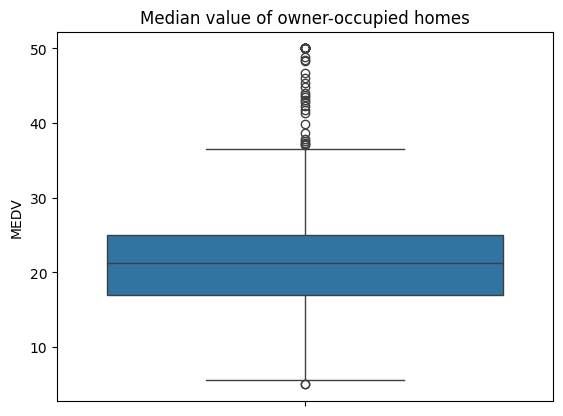

In [36]:
sns.boxplot(boston_df.MEDV)
pyplot.title('Median value of owner-occupied homes')

Most of the median value of owner (75%) occupied the homes are less than 25. Few outliers exists in the each side of the median value of owner-occupied homes.

In [46]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Text(0.5, 1.0, 'Bar plot for the Charles river variable')

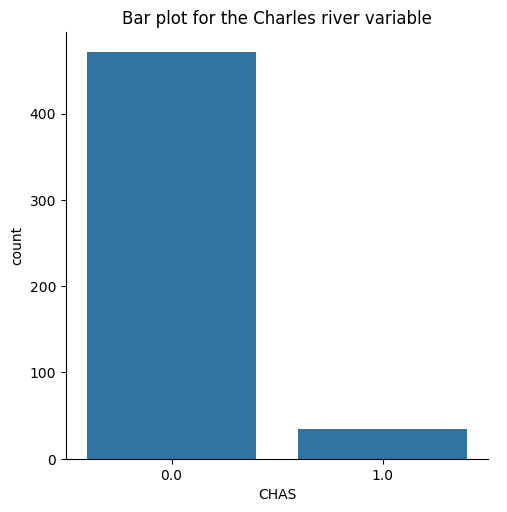

In [50]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Bar plot for the Charles river variable')

Less than 50 houses are bound by Charles River

In [56]:
younger= boston_df[(boston_df['AGE'] <= 35)]
mid= boston_df[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70)]
older= boston_df[(boston_df['AGE'] >= 70)]

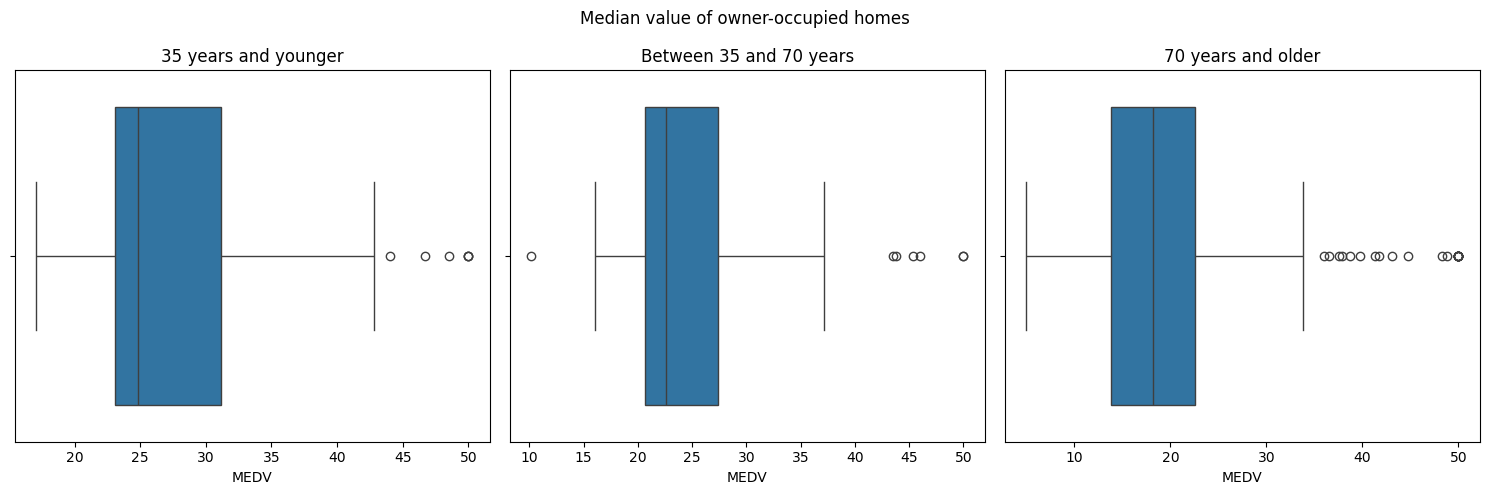

In [68]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Median value of owner-occupied homes')

sns.boxplot(data=younger, x='MEDV', ax=axes[0])
axes[0].set_title('35 years and younger')

sns.boxplot(data=mid, x='MEDV', ax=axes[1])
axes[1].set_title('Between 35 and 70 years')

sns.boxplot(data=older, x='MEDV', ax=axes[2])
axes[2].set_title('70 years and older')


pyplot.tight_layout()
pyplot.show()

Most of the Median values of the owner age from 35 and yonger are below 33; between 35 and 70 years are around 28 and 70 years and olders are less than 25.

Text(0.5, 1.0, 'Nitric oxide concentrations vs the proportion of non-retail business')

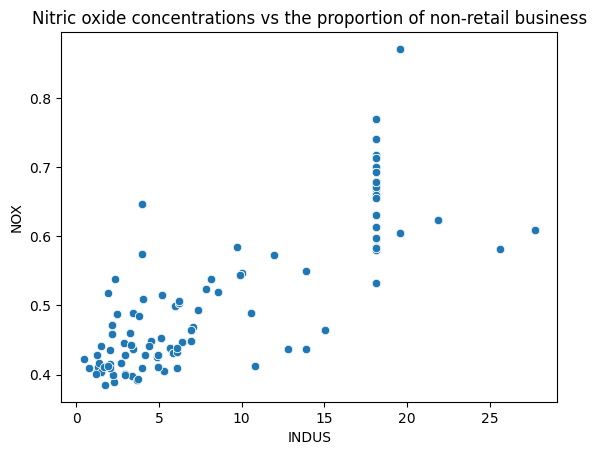

In [75]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Nitric oxide concentrations vs the proportion of non-retail business')

Explanation: Non-retail business has a linear relationship with the nitric oxide concentrations. Therefore, we may say that more non-retail business produce more nitiric oxide.

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

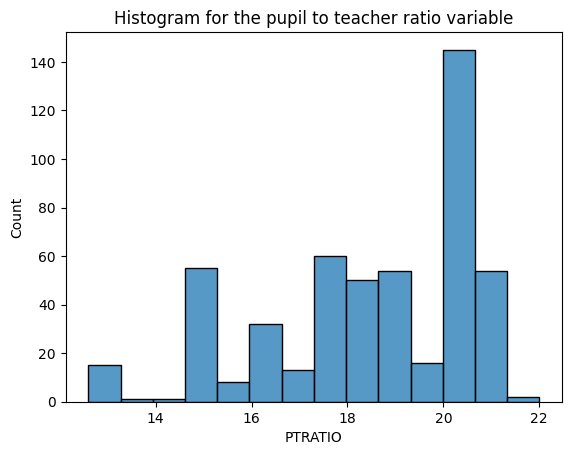

In [74]:
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('Histogram for the pupil to teacher ratio variable')

The pupil to teacher ratio in Boston area data is mostly around 21 to 1. There are about 17 to 21 students per teacher in most of the areas.

In [82]:
boston_df[boston_df.CHAS==0.0]['MEDV'].mean(), boston_df[boston_df.CHAS==1.0]['MEDV'].mean()

(22.093842887473464, 28.439999999999998)

In [86]:
statistic, p_value = scipy.stats.normaltest(boston_df[boston_df.CHAS==0.0]['MEDV'])
statistic, p_value

(81.13341872230123, 2.4104713583166907e-18)

In [87]:
statistic, p_value = scipy.stats.normaltest(boston_df[boston_df.CHAS==1.0]['MEDV'])
statistic, p_value

(5.439131427136192, 0.06590336915149904)

<AxesSubplot:ylabel='MEDV'>

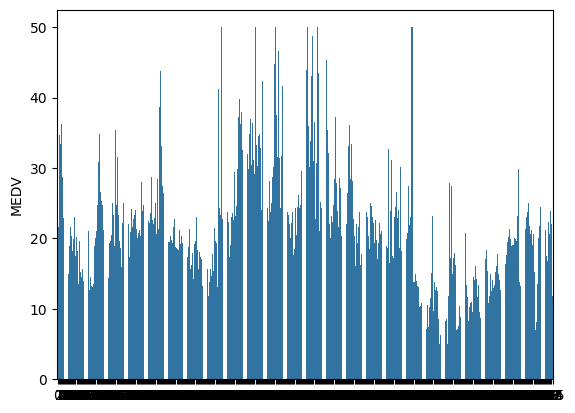

In [93]:
sns.barplot(boston_df[boston_df.CHAS==0.0]['MEDV'])

<AxesSubplot:ylabel='MEDV'>

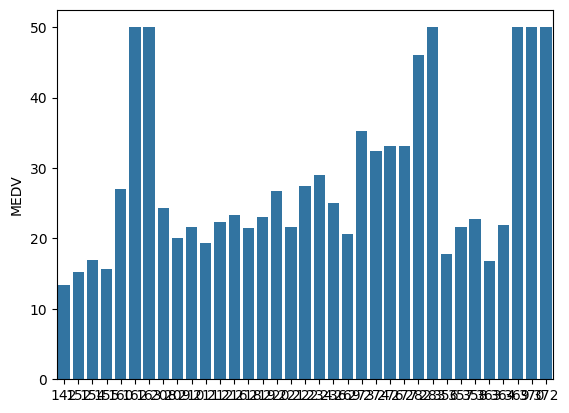

In [89]:
sns.barplot(boston_df[boston_df.CHAS==1.0]['MEDV'])

In [96]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS==0.0]['MEDV'], boston_df[boston_df.CHAS==1.0]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [97]:
younger.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,6.58,23.1,35 years and younger
38,0.17505,0.0,5.96,0.0,0.499,5.966,30.2,3.8473,5.0,279.0,19.2,10.13,24.7,35 years and younger
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,4.32,30.8,35 years and younger
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,1.98,34.9,35 years and younger
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,4.84,26.6,35 years and younger


p value is less than 0.05. So, we reject the null hypothesis. Therefore, there is a significant difference in the median value of houses bounded by the Charles river.

In [98]:
scipy.stats.f_oneway(younger['MEDV'], mid['MEDV'], older['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

p value is less than 0.05. So, we reject the null hypothesis. Therefore, there is a difference in median values of houses of each proportion of owner-occupied units built before 1940.

In [99]:
younger['MEDV'].mean(), mid['MEDV'].mean(), older['MEDV'].mean()

(27.77582417582417, 24.94765625, 19.793379790940765)

In [100]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

p value is less than 0.05. So, we reject the null hypothesis. There is a positive correlation (0.76) between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [105]:
y= boston_df['NOX']
X= boston_df['INDUS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           7.91e-98
Time:                        15:15:49   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
import numpy
numpy.sqrt(0.583)

0.763544366752843

In [107]:
y= boston_df['MEDV']
X= boston_df['DIS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        15:17:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value is less than 0.05. So, we reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. For each increase in additional weighted distance to the five Boston employment centres, there is an increase of 1.0916 unit of the median value of owner occupied homes.